In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

In [2]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [3]:
#To improve the visualization of the graphs
sns.set(rc={'figure.figsize' : (13,10)})

#To ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('dengue_features_train.csv', parse_dates = ['week_start_date'])

In [5]:
df.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
pp.ProfileReport(df)

Number of variables,24
Number of observations,1456
Total Missing (%),1.4%
Total size in memory,273.1 KiB
Average record size in memory,192.1 B
Numeric,18
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,4


In [7]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [8]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
df.replace('?', np.NaN)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [11]:
#df['city'] = df['city'].map({'sj': 'SanJuan', 'iq': 'Iquitos'})

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [14]:
df.shape

(1456, 24)

In [15]:
df['city'].unique()

array(['sj', 'iq'], dtype=object)

In [16]:
df['city'].value_counts()
#sj seems to be more affected with dengue disease

sj    936
iq    520
Name: city, dtype: int64

In [17]:
df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [18]:
df['year'].value_counts()
#disease was highly found in the 2001-2007

2001    104
2003    104
2002    104
2007    104
2006    104
2005    104
2004    104
2000     78
2008     69
1991     52
2009     52
1999     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1990     35
2010     26
Name: year, dtype: int64

In [19]:
df['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

In [20]:
df['weekofyear'].value_counts()
#Disease spread is constant throughout the years mainatining 28 apart from week 53

27    28
26    28
24    28
23    28
22    28
21    28
20    28
19    28
18    28
17    28
16    28
15    28
14    28
13    28
12    28
11    28
10    28
9     28
8     28
7     28
6     28
5     28
4     28
3     28
2     28
25    28
1     28
40    28
51    28
49    28
48    28
47    28
46    28
45    28
44    28
43    28
42    28
41    28
28    28
39    28
38    28
37    28
36    28
35    28
34    28
33    28
32    28
31    28
30    28
29    28
50    28
52    23
53     5
Name: weekofyear, dtype: int64

In [21]:
#Droping the highly corelated columns which should be ignored for analysis.
df.drop(['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
        'reanalysis_tdtr_k'],axis = 1, inplace = True)

In [22]:
df.sample(7)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1332,iq,2008,7,2008-02-12,0.173943,0.198917,0.168429,0.173429,47.23,297.770000,296.922857,306.0,294.8,103.22,95.707143,26.600000,8.033333,31.7,22.1,9.2
566,sj,2001,12,2001-03-19,0.127433,0.059925,0.159229,0.140886,0.00,298.372857,293.045714,300.3,296.8,1.69,72.442857,26.328571,7.528571,30.6,21.7,12.7
1214,iq,2005,44,2005-11-05,0.187571,0.213371,0.171857,0.178957,59.15,299.458571,296.805714,308.6,294.9,49.85,87.231429,28.233333,10.300000,34.3,21.8,102.1
979,iq,2001,18,2001-04-30,0.254014,0.179000,0.312829,0.262557,94.77,297.285714,295.740000,305.6,293.1,103.87,92.192857,27.625000,11.325000,35.2,20.5,51.0
913,sj,2007,47,2007-11-19,NaN,NaN,0.204486,0.156286,73.37,299.821429,295.752857,301.8,297.9,43.40,78.525714,26.900000,6.200000,31.1,22.8,40.4
1327,iq,2008,2,2008-01-08,0.444933,0.275850,0.356900,0.469729,71.84,296.095714,295.200000,302.1,293.3,62.61,95.280000,25.800000,6.300000,31.4,22.6,104.4
1100,iq,2003,35,2003-08-27,0.249586,0.212200,0.250814,0.265214,29.51,297.875714,294.932857,306.6,291.2,18.03,85.725714,28.000000,12.100000,34.4,21.4,95.7


In [23]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm'],
      dtype='object')

In [24]:
df.shape

(1456, 20)

In [25]:
df2 = pd.read_csv('dengue_labels_train.csv')

In [26]:
df2.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [27]:
df2.shape

(1456, 4)

In [28]:
df2.isnull().sum()
#No null values

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [29]:
df2.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [30]:
df['total_cases'] = df2['total_cases'].values

In [31]:
#Adding a new column to a dataset-we use assign
df = df.assign(total_cases = df2['total_cases'].values)

In [32]:
df.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,292.414286,299.8,295.9,32.00,73.365714,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,293.951429,300.9,296.4,17.94,77.368571,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,295.434286,300.5,297.3,26.10,82.052857,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,295.310000,301.4,297.0,13.90,80.337143,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,295.821429,301.9,297.5,12.20,80.460000,28.942857,9.371429,35.0,23.9,5.8,6


In [33]:
df.shape
#To the new column total_cases

(1456, 21)

In [34]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm', 'total_cases'],
      dtype='object')

In [35]:
df['total_cases'].unique()

array([  4,   5,   3,   6,   2,  10,   8,  17,  23,  13,  21,  28,  24,
        20,  40,  27,  42,  33,  43,  37,  57,  71,  44,  56,  53,  52,
        47,  26,  34,  19,  25,  18,  16,  15,  12,  14,  62,  60,  76,
        66,  64,  68,  89,  92, 140, 116, 142, 129, 127, 169, 141, 108,
        78,  70,  81, 104,  90,  85,  55,  65,  38,  59,  29,  30,  31,
        32,  35,  67,  74,  61,  36,  22,  11,   7,  46,  39,  49,  80,
        84,  72, 115, 179, 202, 272, 302, 395, 426, 461, 381, 333, 353,
       410, 364, 359, 288, 221, 149, 112, 154,  91,   9,  48,  50,  75,
        63,  41,  51, 102, 128, 150, 191, 256, 329, 263, 220, 204, 181,
        99,  54,  73,  77,  45,   1,   0,  83,  82, 126, 119, 137, 131,
       106, 101, 170, 135,  58], dtype=int64)

In [36]:
df['total_cases'].value_counts()

0      100
6       71
3       70
5       70
2       69
1       59
7       58
4       56
8       44
9       43
11      40
10      39
17      36
13      34
14      31
16      31
12      29
18      28
21      24
20      21
23      20
15      20
26      20
25      19
30      18
19      17
28      16
29      16
22      16
31      15
      ... 
359      1
364      1
381      1
395      1
410      1
169      1
126      1
150      1
104      1
77       1
426      1
78       1
81       1
58       1
90       1
91       1
99       1
101      1
108      1
149      1
115      1
119      1
74       1
128      1
131      1
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

In [37]:
df.fillna(df.median(), inplace = True)

In [38]:
df.sample(7)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1422,iq,2009,45,2009-11-05,0.388671,0.372817,0.249900,0.373014,45.79,299.161429,297.140000,309.7,292.2,47.31,90.372857,29.866667,12.733333,36.8,21.2,3.5,3
923,sj,2008,5,2008-01-29,0.128817,-0.135400,0.223300,0.170943,0.00,298.021429,292.957143,300.7,294.3,2.70,73.565714,24.571429,6.442857,28.9,20.0,3.1,9
733,sj,2004,23,2004-06-03,-0.070550,-0.028540,0.081586,0.113243,13.51,300.054286,296.445714,302.2,298.2,5.36,80.914286,27.957143,7.542857,33.3,22.8,4.6,13
1228,iq,2006,6,2006-02-12,0.256814,0.136050,0.197829,0.258314,71.87,297.640000,296.808571,304.2,294.0,67.00,95.827143,28.000000,8.800000,32.6,23.6,101.1,20
1125,iq,2004,8,2004-02-19,0.236629,0.167043,0.197029,0.222514,39.06,298.081429,295.642857,310.1,292.6,34.50,87.718571,26.600000,8.100000,35.5,22.0,8.6,1
548,sj,2000,45,2000-11-11,0.110567,0.026700,0.156100,0.041886,77.90,299.061429,293.638571,301.9,295.9,28.80,72.684286,25.871429,6.414286,30.6,21.7,44.9,28
441,sj,1998,43,1998-10-22,0.021300,0.085000,0.196967,0.196200,32.09,300.247143,296.900000,301.9,298.8,36.50,82.038571,28.157143,6.928571,33.9,23.9,26.7,68


# DATA VISUALIZATION

C:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


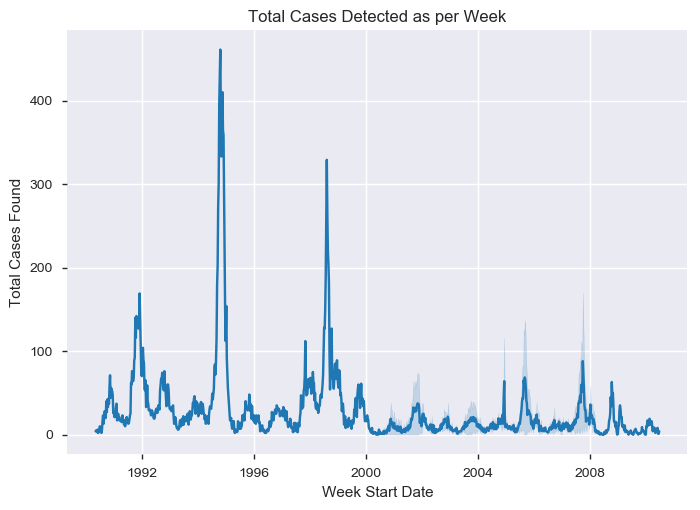

In [39]:
ax = sns.lineplot(x = 'week_start_date', y = 'total_cases', estimator = np.median, data = df )
ax.set(xlabel = 'Week Start Date',
       ylabel = 'Total Cases Found',
       title = 'Total Cases Detected as per Week')
plt.show()
#Most cases were found druing the year 1994-1995

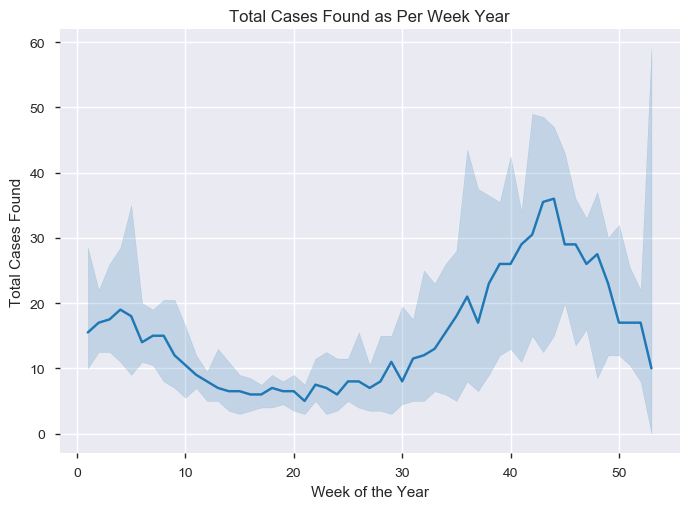

In [40]:
ax2 = sns.lineplot(x = 'weekofyear', y = 'total_cases', estimator = np.median, data = df)
ax2.set(xlabel = 'Week of the Year',
        ylabel = 'Total Cases Found',
        title = 'Total Cases Found as Per Week Year')
plt.show()
#Most cases were found during week 43 - 45 of the year

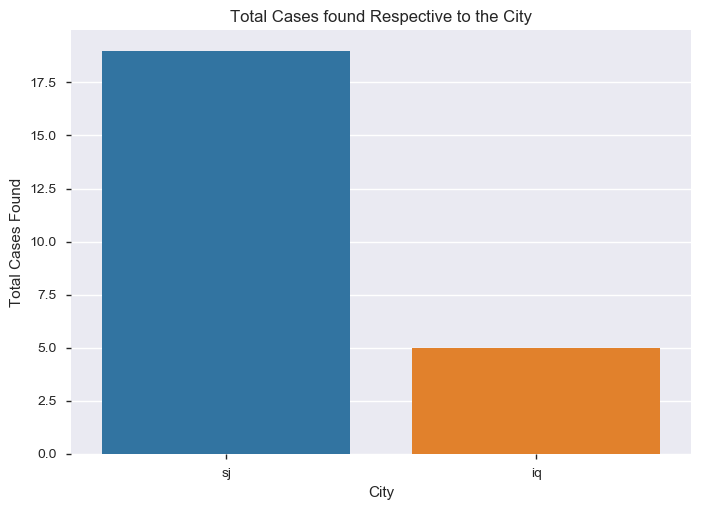

In [41]:
ax = sns.barplot(x = 'city', y = 'total_cases', data = df, ci = None, estimator = np.median)
ax.set(xlabel = 'City',
       ylabel = 'Total Cases Found',
       title = 'Total Cases found Respective to the City')

plt.show()
#Sj seems to have the most report cases

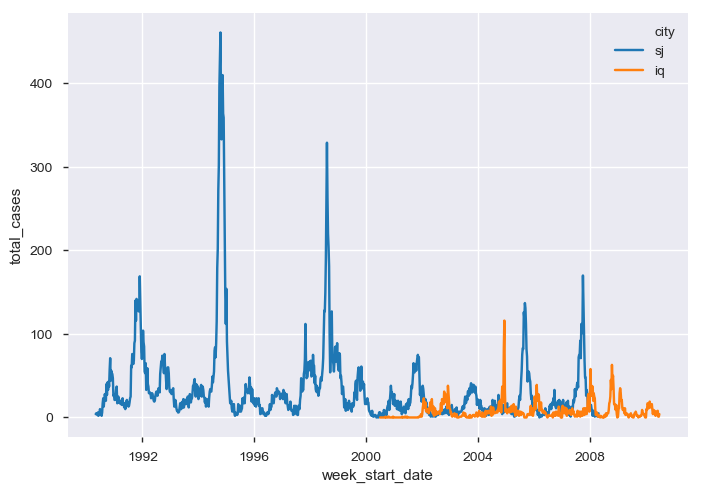

In [42]:
ax3 = sns.lineplot(x = 'week_start_date', y = 'total_cases', hue = 'city', data = df)
ax.set(xlabel = 'Week Start Date', 
       ylabel = 'Total Cases Found',
       title = 'City as Per Week Start Date')

plt.show()
#IQ was just affected later in the years from 2001

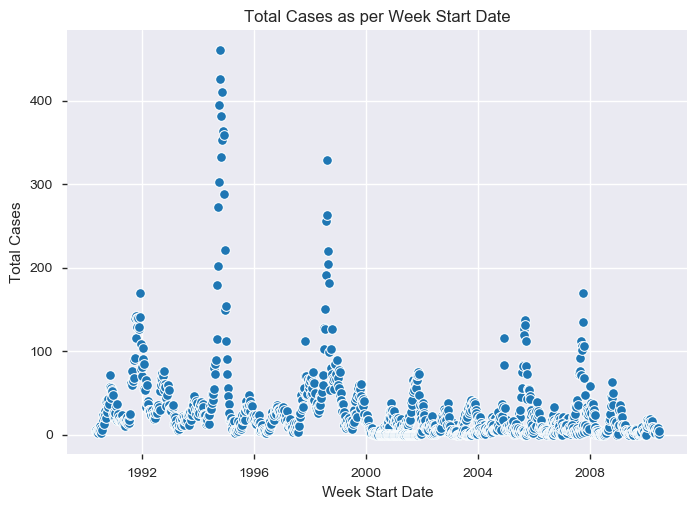

In [43]:
ax = sns.scatterplot(x = 'week_start_date', y = 'total_cases', data = df, estimator = np.median)
ax.set(xlabel = 'Week Start Date',
       ylabel = 'Total Cases',
       title = 'Total Cases as per Week Start Date')

plt.show()

# Feature Engineering

In [44]:
def extract_date(df, column):
    df[column+'_date'] = df[column].apply(lambda x: x.day)
    
extract_date(df, 'week_start_date')
df.head(6)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date_date
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,292.414286,299.8,295.9,32.00,73.365714,25.442857,6.900000,29.4,20.0,16.0,4,30
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,293.951429,300.9,296.4,17.94,77.368571,26.714286,6.371429,31.7,22.2,8.6,5,7
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,295.434286,300.5,297.3,26.10,82.052857,26.714286,6.485714,32.2,22.8,41.4,4,14
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,295.310000,301.4,297.0,13.90,80.337143,27.471429,6.771429,33.3,23.3,4.0,3,21
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,295.821429,301.9,297.5,12.20,80.460000,28.942857,9.371429,35.0,23.9,5.8,6,28
5,sj,1990,23,1990-06-04,0.128817,0.174850,0.254314,0.181743,9.58,299.630000,295.851429,302.4,298.1,26.49,79.891429,28.114286,6.942857,34.4,23.9,39.1,2,4


In [45]:
#Specify Categorical columns then convert them into variables using one-hot-encoding
cat_cols = ['city']

df = pd.get_dummies(df, columns = cat_cols)

In [46]:
df.sample(5)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date_date,city_iq,city_sj
717,2004,7,2004-02-12,-0.042300,0.023100,0.246386,0.192557,0.00,298.325714,293.518571,299.8,297.3,3.04,74.650000,24.885714,6.728571,28.9,20.0,15.0,14,12,0,1
405,1998,7,1998-02-12,0.118250,0.055900,0.181900,0.176314,142.60,299.058571,295.628571,302.2,296.7,18.50,81.612857,27.257143,6.900000,32.2,22.8,79.2,63,12,0,1
601,2001,47,2001-11-19,0.166300,0.189975,0.220229,0.233700,45.80,299.345714,295.560000,302.5,297.3,18.90,79.861429,26.528571,6.100000,31.1,22.8,2.9,72,19,0,1
604,2001,50,2001-12-10,0.008100,0.097475,0.204714,0.178771,31.01,299.057143,295.758571,300.7,297.5,33.78,82.167143,26.314286,5.700000,29.4,22.8,87.8,35,10,0,1
1050,2002,37,2002-09-10,0.307543,0.294171,0.323400,0.190771,25.36,299.015714,293.211429,310.0,290.0,3.20,73.141429,28.233333,13.233333,35.9,19.9,89.9,8,10,1,0


In [47]:
df.shape

(1456, 23)

# FEATURE SELECTION

In [48]:
df.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm', 'total_cases', 'week_start_date_date', 'city_iq',
       'city_sj'],
      dtype='object')

In [49]:
ignored_cols = ['total_cases', 'week_start_date']

In [50]:
x = df.drop(columns = ignored_cols)
y = df['total_cases']

# MODEL DEVELOPMENT

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [52]:
x_train.shape, x_test.shape

((1164, 21), (292, 21))

In [53]:
#Linear Regression Algorithm
lr = LinearRegression()

#Train Model
lr.fit(x_train, y_train)

#Making predictions
y_pred_lr = lr.predict(x_test)

In [54]:
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)

In [55]:
print('Linear Regression')
print('Mean Absolute Error', lr_mae)

Linear Regression
Mean Absolute Error 19.574252534005563


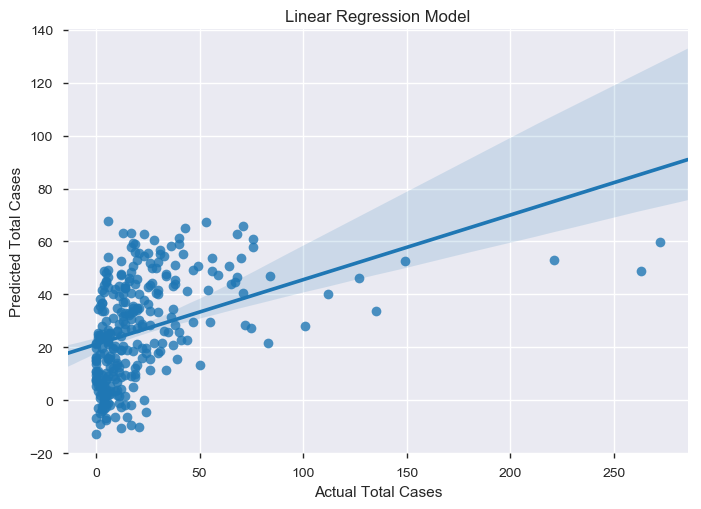

In [56]:
ax = sns.regplot(x = y_test, y = y_pred_lr, data = df)
ax.set(xlabel ='Actual Total Cases',
       ylabel = 'Predicted Total Cases',
       title = 'Linear Regression Model')

plt.show()

In [57]:
#Decision Tree Algorithm

dt = DecisionTreeRegressor()

#fit the model
dt.fit(x_train, y_train)

#Prediction model
y_pred_dt = dt.predict(x_test)

In [58]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred_dt)

In [59]:
print('Decision Tree Regressor')
print('Mean Absolute Error', dt_mae)

Decision Tree Regressor
Mean Absolute Error 16.523972602739725


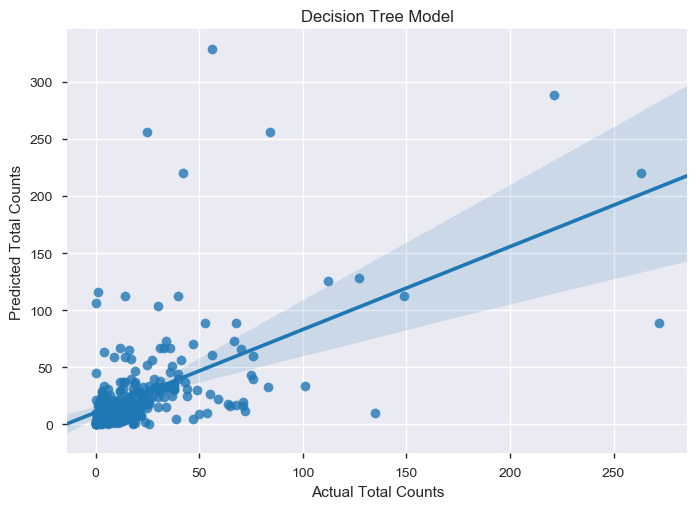

In [60]:
ax = sns.regplot(x = y_test, y = y_pred_dt)
ax.set(xlabel = 'Actual Total Counts',
       ylabel = 'Predicted Total Counts',
       title = 'Decision Tree Model')
plt.show()

In [61]:
#Random Forest Algorithm
rf = RandomForestRegressor(n_estimators=  100)

#fit the model
rf.fit(x_train, y_train)

#Prediction Model
y_pred_rf = rf.predict(x_test)

In [62]:
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)

In [63]:
print('Random Forest Model')
print('Mean Absolute Error', rf_mae)

Random Forest Model
Mean Absolute Error 13.052671232876712


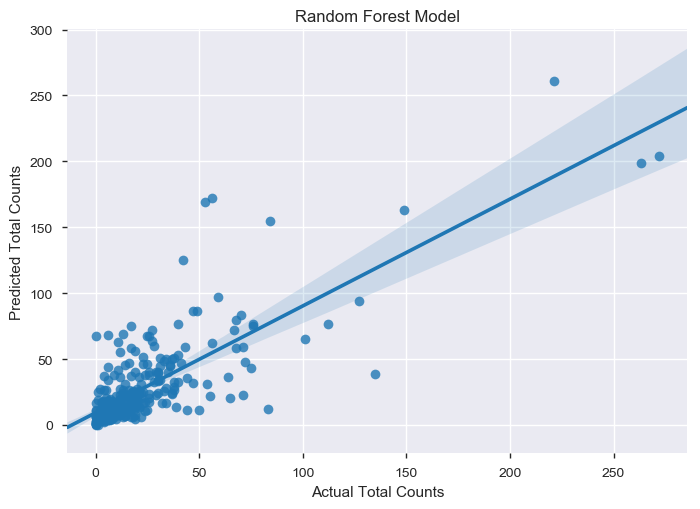

In [64]:
ax = sns.regplot(x = y_test, y = y_pred_rf)
ax.set(xlabel = 'Actual Total Counts',
       ylabel = 'Predicted Total Counts',
       title = 'Random Forest Model')

plt.show()

In [65]:
rf.feature_importances_

array([2.67492282e-01, 1.71591638e-01, 1.90085032e-02, 6.69276947e-02,
       2.78519883e-02, 7.86863360e-02, 1.91952232e-02, 5.76132239e-02,
       3.53479015e-02, 1.39142432e-02, 1.53399139e-02, 4.41697037e-02,
       2.61277649e-02, 1.66238061e-02, 2.06893250e-02, 5.48160672e-02,
       1.17044365e-02, 3.90867229e-02, 1.37053110e-02, 2.30071191e-05,
       8.49074822e-05])

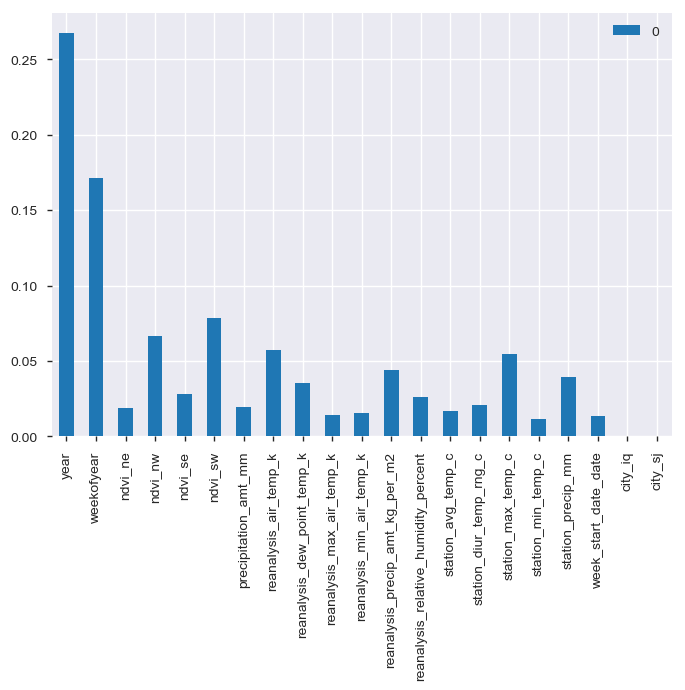

In [66]:
pd.DataFrame(rf.feature_importances_, x.columns).plot.bar()

# STAGE 2 - MODEL PREDICTION MODEL

In [67]:
df3 = pd.read_csv('dengue_features_test.csv', parse_dates = ['week_start_date'])

In [68]:
df3.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
181,sj,2011,42,2011-10-22,-0.02160,-0.040400,0.184886,0.157443,19.83,300.567143,300.557143,296.318571,302.2,298.9,7.30,77.697143,19.83,17.714286,2.257143,27.842857,7.328571,32.8,23.3,10.4
80,sj,2009,46,2009-11-12,NaN,-0.206000,0.232083,0.102686,51.55,300.204286,300.135714,295.954286,301.9,298.2,37.29,77.665714,51.55,17.402857,2.385714,27.400000,5.428571,30.6,22.8,121.1
124,sj,2010,37,2010-09-17,0.00290,0.020067,0.218057,0.133971,57.80,300.948571,300.900000,297.407143,302.5,299.3,56.10,81.211429,57.80,19.027143,2.314286,28.414286,5.328571,31.7,24.4,77.1
233,sj,2012,42,2012-10-21,NaN,0.076150,0.152371,0.107571,31.75,300.678571,300.764286,297.311429,302.4,299.2,42.10,81.900000,31.75,18.831429,2.214286,28.528571,6.357143,33.9,23.3,32.5
62,sj,2009,28,2009-07-09,0.02915,0.111733,0.179529,0.175971,40.29,300.870000,300.928571,296.430000,302.8,298.8,11.49,76.918571,40.29,17.855714,2.828571,29.128571,6.571429,33.9,23.9,50.0


In [69]:
#To improve visualization
sns.set(rc = {'figure.figsize': (13, 10)})

#To ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [70]:
pp.ProfileReport(df3)

Number of variables,24
Number of observations,416
Total Missing (%),1.0%
Total size in memory,78.1 KiB
Average record size in memory,192.2 B
Numeric,17
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,5


In [71]:
df3.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [72]:
df3.replace('?', np.NaN)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,301.9,297.6,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,302.4,297.5,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,296.268571,302.5,298.5,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,296.411429,302.3,298.7,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null datetime64[ns]
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_

In [74]:
df3.duplicated().sum()

0

In [75]:
df3.shape

(416, 24)

In [76]:
df3['city'].unique()

array(['sj', 'iq'], dtype=object)

In [77]:
df3['city'].value_counts()

sj    260
iq    156
Name: city, dtype: int64

In [78]:
df3.drop(['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
        'reanalysis_tdtr_k'], axis = 1, inplace = True)

In [79]:
df3.sample(4)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
52,sj,2009,18,2009-04-30,0.055800,0.040700,0.187314,0.139529,18.69,298.602857,294.055714,300.8,296.9,10.9,76.124286,26.728571,6.214286,31.7,22.2,23.6
104,sj,2010,17,2010-04-30,-0.215400,-0.040850,0.068300,0.056157,43.33,299.662857,296.558571,301.8,298.2,30.9,83.180000,27.800000,5.257143,32.8,23.3,21.9
308,iq,2011,22,2011-06-04,0.114586,0.130271,0.142486,0.209486,28.10,296.657143,295.432857,304.7,292.9,36.5,93.810000,NaN,NaN,33.4,NaN,23.4
48,sj,2009,14,2009-04-02,0.100300,0.103500,0.122700,0.106514,3.79,296.692857,291.425714,298.9,294.1,9.4,72.464286,25.057143,5.542857,28.9,21.1,3.8


In [80]:
df3.shape

(416, 20)

In [81]:
df3.fillna(df3.median(), inplace=True)

In [82]:
df3.sample(4)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
286,iq,2011,52,2011-01-01,0.277500,0.304367,0.235656,0.289433,43.67,296.571429,295.940000,303.8,294.2,222.0,96.627143,26.900000,8.600000,33.2,22.0,54.7
398,iq,2013,9,2013-02-26,0.345517,0.346867,0.337117,0.382550,39.19,297.000000,296.245714,305.9,292.7,62.4,96.022857,27.600000,9.566667,34.2,21.8,111.3
116,sj,2010,29,2010-07-23,0.009833,0.031780,0.051157,0.075657,93.30,300.247143,297.280000,302.2,298.8,100.9,84.011429,27.857143,5.885714,32.2,23.3,105.1
164,sj,2011,25,2011-06-25,0.075300,0.087750,0.241000,0.203857,28.95,300.698571,297.532857,302.4,299.4,15.2,82.897143,28.214286,6.571429,33.3,22.2,70.8


# Feature Engineering

In [83]:
def extract_date(df3, column):
    df3[column+'_date'] = df3[column].apply(lambda x: x.day)
    
extract_date(df3, 'week_start_date')

In [84]:
df3.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_date
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,294.527143,301.1,296.4,25.37,78.781429,26.528571,7.057143,33.3,21.7,75.2,29
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,294.395714,300.8,296.7,21.83,78.230000,26.071429,5.557143,30.0,22.2,34.3,6
2,sj,2008,20,2008-05-13,-0.0015,0.088700,0.151083,0.091529,3.66,299.455714,295.308571,302.2,296.4,4.12,78.270000,27.928571,7.785714,32.8,22.8,3.0,13
3,sj,2008,21,2008-05-20,0.1101,-0.019867,0.124329,0.125686,0.00,299.690000,294.402857,303.0,296.9,2.20,73.015714,28.057143,6.271429,33.3,24.4,0.3,20
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,294.760000,302.3,297.3,4.36,74.084286,27.614286,7.085714,33.3,23.3,84.1,27


In [85]:
#Specifying the categorical columns
cat_cols = ['city']

df3 = pd.get_dummies(df3, columns = cat_cols)

In [86]:
df3.sample(5)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_date,city_iq,city_sj
214,2012,23,2012-06-10,0.035500,0.011800,0.253286,0.203057,6.44,300.437143,296.354286,302.5,298.5,0.10,78.627143,29.200000,7.200000,33.9,24.4,3.6,10,0,1
326,2011,40,2011-10-08,0.386500,0.308271,0.406614,0.386743,62.22,297.098571,295.755714,306.7,291.9,47.50,93.280000,27.525000,11.000000,34.2,21.1,38.8,8,1,0
105,2010,18,2010-05-07,0.001450,-0.011500,0.214600,0.213786,13.30,300.294286,296.421429,303.1,298.2,24.08,79.692857,28.528571,6.400000,34.4,22.8,31.7,7,0,1
288,2011,2,2011-01-15,0.219443,0.235283,0.200029,0.277986,48.87,298.168571,296.037143,306.6,295.0,134.50,89.675714,27.833333,10.800000,34.4,21.5,33.0,15,1,0
23,2008,41,2008-10-07,0.130600,0.089700,0.186086,0.196443,6.16,300.715714,296.164286,303.0,298.7,21.10,76.361429,28.171429,5.942857,31.7,24.4,8.5,7,0,1


In [87]:
df3.shape

(416, 22)

# FEATURE SELECTION

In [88]:
ignored_cols1 = ['week_start_date']

In [89]:
x = df3.drop(columns = ignored_cols1)

# MODEL DEVELOPMENT

Random Forest

In [90]:
total_cases = rf.predict(x)

In [91]:
pwd

'C:\\Users\\James Riri\\Desktop\\DATA SCIENCE PROJECTS'

In [92]:
total_cases

array([  4.6 ,   4.42,   4.69,   5.79,   9.92,  11.69,  12.42,  16.89,
        23.48,  18.53,  16.5 ,  23.61,  29.86,  24.01,  34.04,  51.02,
        33.94,  53.48,  59.47,  47.14,  39.58,  28.  ,  28.74,  31.54,
        34.18,  20.7 ,  21.21,  24.9 ,  25.36,  26.76,  19.96,  20.2 ,
        12.49,  18.77,  23.78,  14.43,  12.82,  14.03,  11.32,  12.03,
        10.79,  11.57,  10.05,  13.  ,   6.44,   5.15,   5.64,   4.96,
         4.95,   3.96,   6.39,   4.42,   4.87,   5.45,   5.3 ,   4.32,
         9.99,   7.76,  10.12,  13.89,  14.82,  26.95,  33.07,  31.44,
        30.03,  37.39,  41.96,  35.08,  46.47,  59.48,  57.51,  31.25,
        61.71,  39.29,  56.69,  54.04,  70.42,  54.58,  40.01,  20.01,
        26.18,  25.07,  28.21,  20.29,  16.6 ,  18.35,  25.99,   8.08,
        14.74,  12.03,  16.15,  11.31,   9.84,  17.25,  12.01,  12.1 ,
        11.94,   9.44,   7.38,  11.27,   9.04,   6.72,   4.81,   5.39,
         9.21,  14.78,   8.18,  14.7 ,  15.22,  27.18,  32.28,  47.03,
      

In [93]:
#Load previous testing set(dengue features train)
#attach the total cases column()
#assign the columns the need for submission
#save the file sub_report = pd.to_save('name')


#df3 = df3.to_csv(r'C:\Users\James Riri\Desktop\DATA SCIENCE PROJECTS\deng_ai_final.csv', header=True, index=False)

In [94]:
df3.head(5)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_date,city_iq,city_sj
0,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,294.527143,301.1,296.4,25.37,78.781429,26.528571,7.057143,33.3,21.7,75.2,29,0,1
1,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,294.395714,300.8,296.7,21.83,78.230000,26.071429,5.557143,30.0,22.2,34.3,6,0,1
2,2008,20,2008-05-13,-0.0015,0.088700,0.151083,0.091529,3.66,299.455714,295.308571,302.2,296.4,4.12,78.270000,27.928571,7.785714,32.8,22.8,3.0,13,0,1
3,2008,21,2008-05-20,0.1101,-0.019867,0.124329,0.125686,0.00,299.690000,294.402857,303.0,296.9,2.20,73.015714,28.057143,6.271429,33.3,24.4,0.3,20,0,1
4,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,294.760000,302.3,297.3,4.36,74.084286,27.614286,7.085714,33.3,23.3,84.1,27,0,1


In [95]:
df3['Total Values'] = total_cases

In [96]:
df3.head(5)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_date,city_iq,city_sj,Total Values
0,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,294.527143,301.1,296.4,25.37,78.781429,26.528571,7.057143,33.3,21.7,75.2,29,0,1,4.60
1,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,294.395714,300.8,296.7,21.83,78.230000,26.071429,5.557143,30.0,22.2,34.3,6,0,1,4.42
2,2008,20,2008-05-13,-0.0015,0.088700,0.151083,0.091529,3.66,299.455714,295.308571,302.2,296.4,4.12,78.270000,27.928571,7.785714,32.8,22.8,3.0,13,0,1,4.69
3,2008,21,2008-05-20,0.1101,-0.019867,0.124329,0.125686,0.00,299.690000,294.402857,303.0,296.9,2.20,73.015714,28.057143,6.271429,33.3,24.4,0.3,20,0,1,5.79
4,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,294.760000,302.3,297.3,4.36,74.084286,27.614286,7.085714,33.3,23.3,84.1,27,0,1,9.92


In [97]:
final_copy = pd.read_csv('dengue_features_test.csv')

In [98]:
final_copy.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [99]:
final_copy['total_cases'] = total_cases
final_copy['total_cases'] = final_copy['total_cases'].astype(int)

In [100]:
final_copy.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,4
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,4
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,9


In [101]:
final_copy[['city', 'year', 'weekofyear', 'total_cases']]

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,4
2,sj,2008,20,4
3,sj,2008,21,5
4,sj,2008,22,9
5,sj,2008,23,11
6,sj,2008,24,12
7,sj,2008,25,16
8,sj,2008,26,23
9,sj,2008,27,18


In [102]:
final_copy[['city', 'year', 'weekofyear', 'total_cases']].to_csv('JR Deng AI Prediction', index = False)